<a href="https://colab.research.google.com/github/Javorai/Coding-Dojo-Core/blob/main/Modelos_basados_en_%C3%A1rbol_An%C3%A1lisis_y_Predicci%C3%B3n_de_Precios_de_Autos_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis y Predicción de Precios de Autos (Core)**
**Objetivo:** Aplicar técnicas de regresión lineal, KNN y árboles de decisión para predecir precios de autos utilizando un dataset de Kaggle. Realizar un Análisis Exploratorio de Datos (EDA) completo y comparar el rendimiento de los modelos mediante benchmarking.

Dataset: [Automobile Dataset](https://www.kaggle.com/datasets/toramky/automobile-dataset)

**Descripción del Dataset:** Este conjunto de datos contiene información detallada sobre diferentes modelos de autos, incluyendo características técnicas y precios. El objetivo es predecir el precio de los autos basándose en sus características.

**Instrucciones:**

**Parte 1: Análisis Exploratorio de Datos (EDA)**
1. **Carga y Exploración de Datos:**

* Cargar el dataset y revisar la estructura básica.
* Descripción de las variables y su distribución.
* Detección y tratamiento de valores nulos.
* Identificación y tratamiento de outliers.
* Análisis de correlación entre variables.

**Parte 2: Preparación de Datos**
2. **Preprocesamiento:**

* Selección de características importantes.
* Transformación de variables categóricas.
* División del conjunto de datos en entrenamiento y prueba.
* Escalado de características.
**Parte 3: Modelos de Regresión**

3. **Regresión Lineal:**

* Entrenamiento del modelo.
* Evaluación del rendimiento (MSE y R²).

4. **K-Nearest Neighbors (KNN):**

Entrenamiento del modelo.
Evaluación del rendimiento (MSE y R²).
5. **Árbol de Decisión:**

* Entrenamiento del modelo.
* Evaluación del rendimiento (MSE y R²).
**Parte 4: Benchmarking y Comparación de Modelos**

6. **Comparación de Modelos:**

* Comparar los resultados de los tres modelos en términos de MSE y R².
* Discusión sobre las diferencias en el rendimiento de los modelos.
**Conclusión**

7. **Interpretación de Resultados:**

* Analizar cuál de los modelos es más adecuado para el problema de predicción de precios de autos.
* Discutir posibles mejoras y próximos pasos, como el ajuste de hiperparámetros o el uso de técnicas avanzadas.
* Tareas Adicionales y Desafíos

8. **Desafíos Adicionales:**

* Optimización de Modelos: Usar GridSearchCV para optimizar los hiperparámetros de KNN y el Árbol de Decisión.
* Feature Engineering: Crear nuevas características basadas en las existentes para mejorar el rendimiento del modelo.
* Validación Cruzada: Implementar validación cruzada para evaluar la estabilidad de los modelos.

**Nota:** Asegúrate de documentar cada paso del proceso, incluyendo la justificación de las decisiones tomadas durante el preprocesamiento y la selección de modelos. Presenta un informe final con tus hallazgos, conclusiones y posibles mejoras.

Mounted at /content/drive
Dimensiones del dataset: (205, 26)

Primeras 5 filas:
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front     

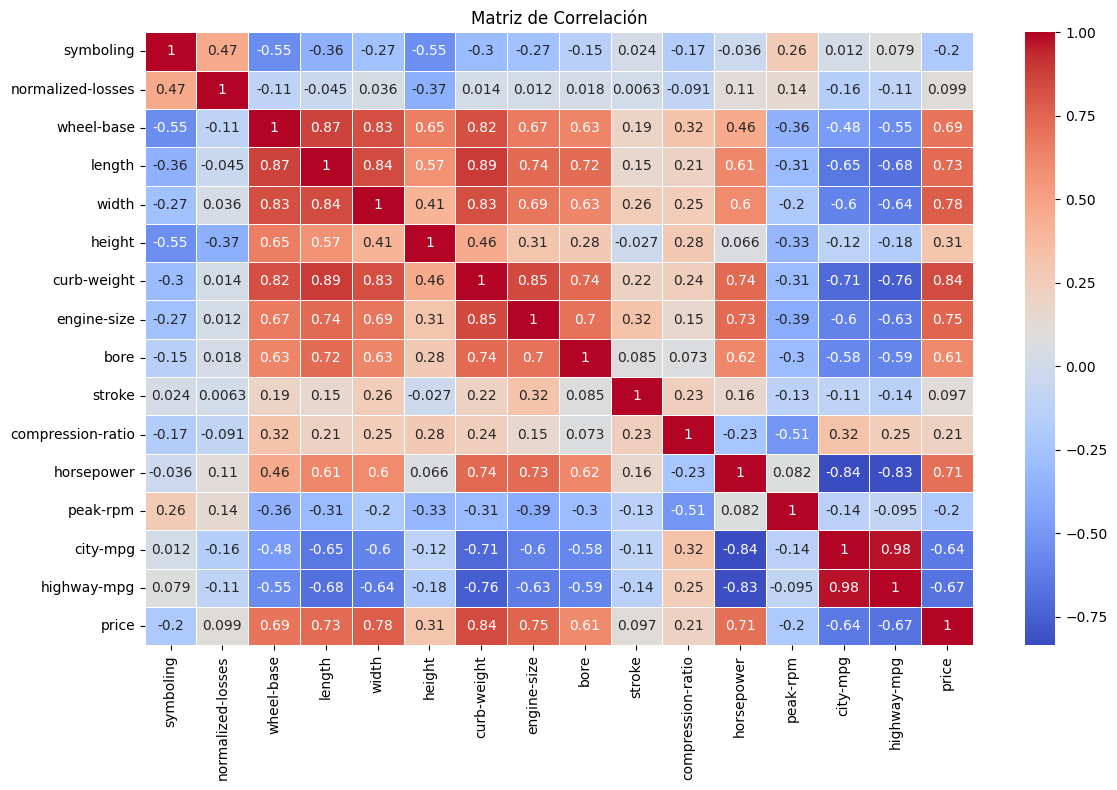

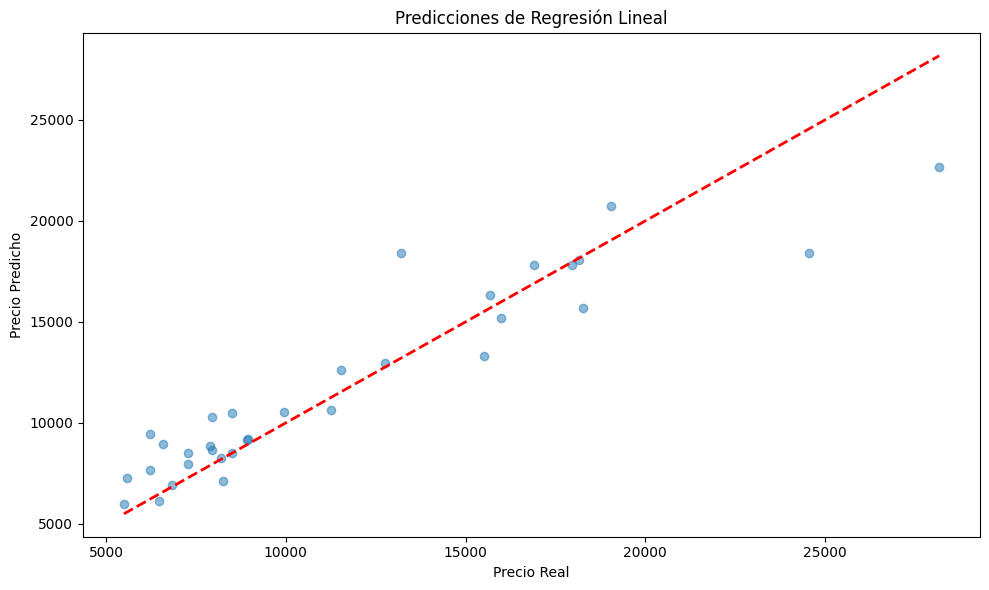

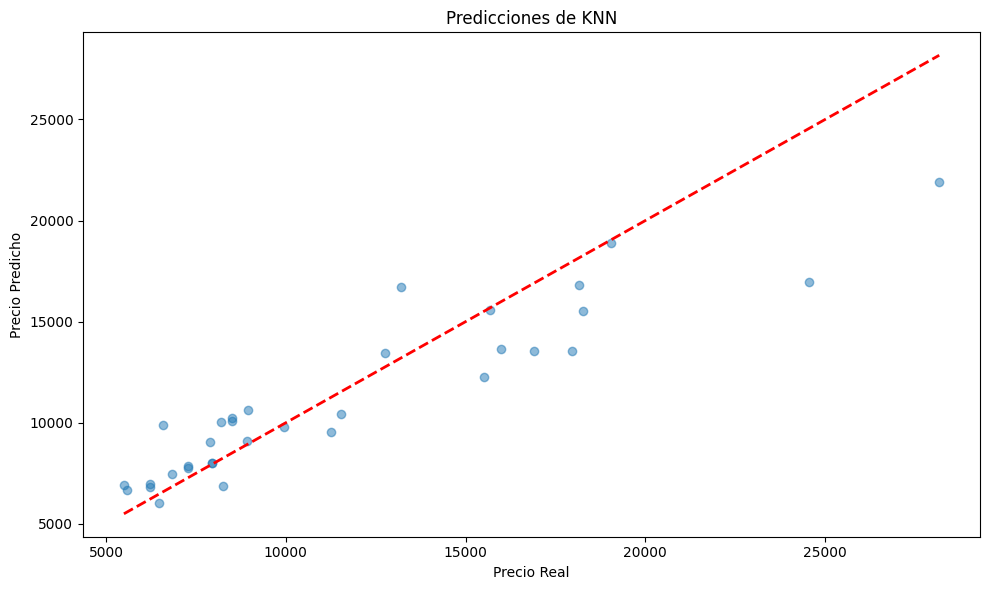

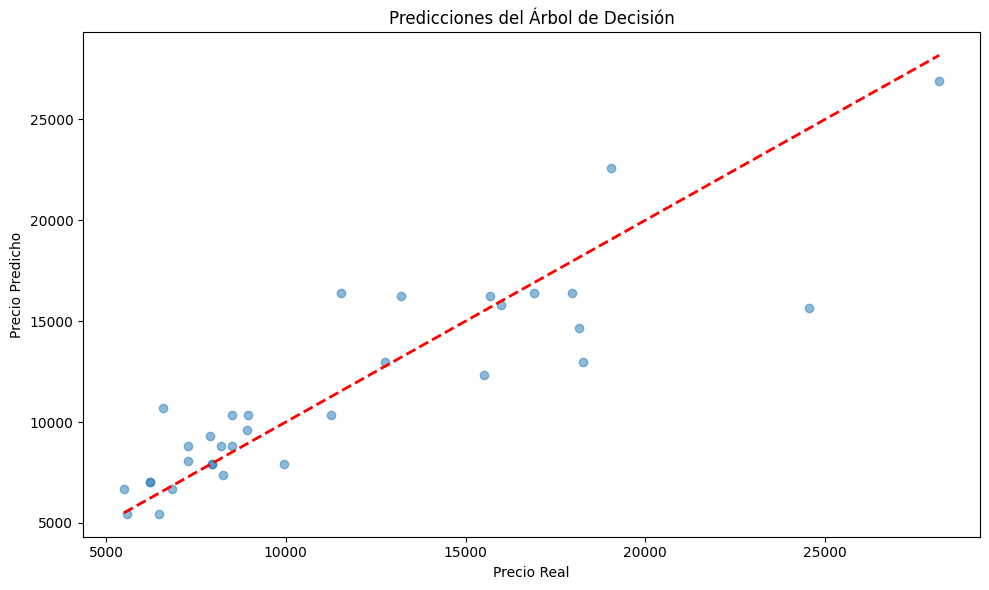


Comparación de modelos:
              Modelo           MSE        R²
0   Regresión Lineal  4.501593e+06  0.858678
1                KNN  6.105701e+06  0.808319
2  Árbol de Decisión  6.590207e+06  0.793108

Resultados de validación cruzada (R² promedio):
Regresión Lineal: 0.6801
KNN: 0.7590
Árbol de Decisión: 0.7935

Mejores hiperparámetros KNN:
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

Mejores hiperparámetros Árbol de Decisión:
{'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 5}

Importancia de características (Top 10):
              feature  importance
14        highway-mpg    0.621892
4               width    0.182388
6         curb-weight    0.067346
11         horsepower    0.046201
1   normalized-losses    0.041328
7         engine-size    0.013293
3              length    0.006507
10  compression-ratio    0.006246
13           city-mpg    0.004740
5              height    0.002985


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Parte 1: Análisis Exploratorio de Datos (EDA)

# 1.1 Carga de datos
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
Automobile_data = "/content/drive/MyDrive/Bootcamp Coding Dojo/DataScience/Tareas Core/Archivos CSV-Tareas/Automobile_data.csv"
df = pd.read_csv(Automobile_data)

# 1.2 Carga y Exploración de Datos
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras 5 filas:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())

# 1.3 Detección y tratamiento de valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())
df = df.replace('?', np.nan)

# Convertir columnas numéricas
numeric_columns = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Imputar valores faltantes
df['normalized-losses'] = df['normalized-losses'].fillna(df['normalized-losses'].mean())
df['bore'] = df['bore'].fillna(df['bore'].mean())
df['stroke'] = df['stroke'].fillna(df['stroke'].mean())
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
df['peak-rpm'] = df['peak-rpm'].fillna(df['peak-rpm'].mean())
df['price'] = df['price'].fillna(df['price'].mean())

# 1.4 Identificación y tratamiento de outliers
def identify_outliers_iqr(df, columns):
    outlier_indices = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definición de límites
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificación de outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices.extend(outliers.index.tolist())

    return set(outlier_indices)

# Identificando outliers en las variables numéricas
numeric_columns = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
outlier_indices = identify_outliers_iqr(df, numeric_columns)
num_outliers = len(outlier_indices)
num_data = len(df)

print(f"Número total de outliers identificados: {num_outliers}")
print(f"Porcentaje de outliers: {(num_outliers / num_data) * 100:.2f}%")

# Eliminar outliers
df = df.drop(index=outlier_indices)
print(f"Dimensiones del dataset después de eliminar outliers: {df.shape}")

# 1.5 Análisis de correlación
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

# Parte 2: Preparación de Datos

# 2.1 Selección de características
features = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
           'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
           'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

categorical_features = ['make', 'fuel-type', 'aspiration', 'num-of-doors',
                       'body-style', 'drive-wheels', 'engine-location',
                       'engine-type', 'num-of-cylinders', 'fuel-system']

X = df[features + categorical_features]
y = df['price']

# 2.2 Transformación de variables categóricas
le = LabelEncoder()
for feature in categorical_features:
    X.loc[:, feature] = le.fit_transform(X.loc[:, feature])

# 2.3 División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2.4 Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parte 3: Modelos de Regresión y Visualización de Predicciones

# Función para crear gráfico de predicciones vs valores reales
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Precio Real')
    plt.ylabel('Precio Predicho')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# 3.1 Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
plot_predictions(y_test, lr_pred, 'Predicciones de Regresión Lineal')

# 3.2 K-Nearest Neighbors
knn_model = KNeighborsRegressor()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_knn = GridSearchCV(knn_model, param_grid_knn, cv=5)
grid_knn.fit(X_train_scaled, y_train)
knn_pred = grid_knn.predict(X_test_scaled)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)
plot_predictions(y_test, knn_pred, 'Predicciones de KNN')

# 3.3 Árbol de Decisión
dt_model = DecisionTreeRegressor()
param_grid_dt = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_dt = GridSearchCV(dt_model, param_grid_dt, cv=5)
grid_dt.fit(X_train_scaled, y_train)
dt_pred = grid_dt.predict(X_test_scaled)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
plot_predictions(y_test, dt_pred, 'Predicciones del Árbol de Decisión')

# Parte 4: Benchmarking y Comparación de Modelos

# 4.1 Comparación de métricas
results = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'KNN', 'Árbol de Decisión'],
    'MSE': [lr_mse, knn_mse, dt_mse],
    'R²': [lr_r2, knn_r2, dt_r2]
})

print("\nComparación de modelos:")
print(results)

# 4.2 Validación cruzada
models = {
    'Regresión Lineal': lr_model,
    'KNN': grid_knn.best_estimator_,
    'Árbol de Decisión': grid_dt.best_estimator_
}

cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    cv_results[name] = scores.mean()

print("\nResultados de validación cruzada (R² promedio):")
for name, score in cv_results.items():
    print(f"{name}: {score:.4f}")

# Mejores hiperparámetros
print("\nMejores hiperparámetros KNN:")
print(grid_knn.best_params_)
print("\nMejores hiperparámetros Árbol de Decisión:")
print(grid_dt.best_params_)

# Importancia de características para el árbol de decisión
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': grid_dt.best_estimator_.feature_importances_
}).sort_values('importance', ascending=False)

print("\nImportancia de características (Top 10):")
print(feature_importance.head(10))


